In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam 
from keras.utils import np_utils
 
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

### モデルの作成

In [4]:
def build_model():
    # モデルの作成
    model = Sequential()
    model.add(Dense(512, input_shape=(784,)))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
 
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
 
    model.add(Dense(10))
    model.add(Activation('softmax'))
 
    # 損失関数の定義
    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy'])
    
    return model

### plot用関数

In [5]:
def plot_history(history):
    # 精度の履歴をプロット
    plt.plot(history.history['acc'],"o-",label="accuracy")
    plt.plot(history.history['val_acc'],"o-",label="val_acc")
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc="lower right")
    plt.show()
 
    # 損失の履歴をプロット
    plt.plot(history.history['loss'],"o-",label="loss",)
    plt.plot(history.history['val_loss'],"o-",label="val_loss")
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='lower right')
    plt.show()

### データセットの読み込み

In [7]:
#　MNISTのデータの読み込み
# 訓練データ６万件、テストデータ１万件
# 28ピクセル × 28ピクセル = 784ピクセルのデータ
# 色は0〜255
X_train, y_train = load_mnist('./data/fashion', kind='train')
X_test, y_test = load_mnist('./data/fashion', kind='t10k')
X_train = X_train.reshape(60000, 784).astype('float32')
X_test  = X_test.reshape(10000, 784).astype('float32')
X_train /= 255
X_test  /= 255

In [8]:
# 10次元配列に変換　//数字の５ならこんな感じ[0,0,0,0,1,0,0,0,0,0]
y_train = np_utils.to_categorical(y_train, 10)
y_test  = np_utils.to_categorical(y_test, 10)

In [9]:
nb_epoch = 50 #学習させる回数. pytyonのnb_epochとはrangeの繰り返しのこと
batch_size = 128 #無作為に128画像取得。128という数字に理論的な根拠は考慮していない

In [10]:
# データで訓練 今回は時間省略のため2回で学習する
model = build_model()
history = model.fit(X_train, y_train, 
    nb_epoch=nb_epoch, 
    batch_size=batch_size,
    validation_data=(X_test, y_test)
)

/Users/kubota/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 17s - loss: 0.5161 - acc: 0.8141 - val_loss: 0.4205 - val_acc: 0.8460
Epoch 2/50
60000/60000 [==============================] - 15s - loss: 0.3808 - acc: 0.8610 - val_loss: 0.3691 - val_acc: 0.8650
Epoch 3/50
60000/60000 [==============================] - 15s - loss: 0.3483 - acc: 0.8711 - val_loss: 0.3599 - val_acc: 0.8711
Epoch 4/50
60000/60000 [==============================] - 16s - loss: 0.3257 - acc: 0.8789 - val_loss: 0.3460 - val_acc: 0.8703
Epoch 5/50
60000/60000 [==============================] - 15s - loss: 0.3067 - acc: 0.8868 - val_loss: 0.3840 - val_acc: 0.8653
Epoch 6/50
60000/60000 [==============================] - 15s - loss: 0.2973 - acc: 0.8897 - val_loss: 0.3317 - val_acc: 0.8779
Epoch 7/50
60000/60000 [==============================] - 15s - loss: 0.2878 - acc: 0.8922 - val_loss: 0.3329 - val_acc: 0.8800
Epoch 8/50
60000/60000 [==============================

 9952/10000 [============================>.] - ETA: 0sloss= 0.347022763997
accuracy= 0.9028


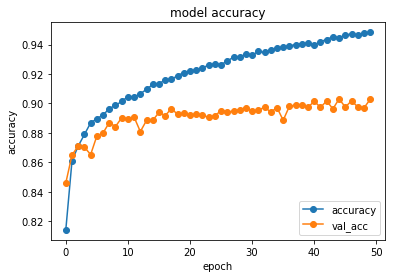

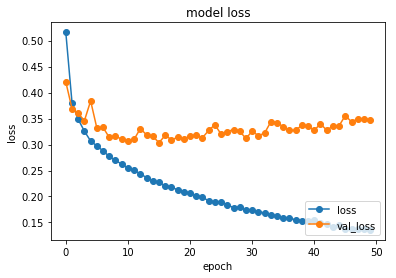

In [11]:
#学習モデルの保存
json_string = model.to_json()

#モデルのファイル名　拡張子.json
open('mnist.json', 'w').write(json_string)
#重みファイルの保存 拡張子がhdf5
model.save_weights('out/mnist.hdf5')
 
# モデルの評価を行う
score = model.evaluate(X_test, y_test, verbose=1)
 
print('loss=', score[0])
print('accuracy=', score[1])
    
# modelに学習させた時の変化の様子をplot
plot_history(history)